In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Chargement des données
file_path = "Patients_hopital.csv"  # Chemin du fichier
data = pd.read_csv(file_path, sep=';')

In [10]:
# 2. Exploration des données
print("Aperçu des données :")
print(data.head())

Aperçu des données :
  Identifiant_patient  GENRE  AGE  TAILLE  POIDS  TTAILLE  SYS  DIA   IMC  \
0               I0001      0   58   179.8   76.7     90.6  125   78  23.8   
1               I0002      0   22   168.1   65.4     78.1  107   54  23.2   
2               I0003      0   32   182.1   81.3     96.5  126   81  24.6   
3               I0004      0   31   174.5   79.7     87.7  110   68  26.2   
4               I0005      0   28   171.7   69.2     87.1  110   66  23.5   

   JMBG  COUD  POIGN  BRAS  
0  42.5   7.7    6.4  31.9  
1  40.2   7.6    6.2  31.0  
2  44.4   7.3    5.8  32.7  
3  42.8   7.5    5.9  33.4  
4  40.0   7.1    6.0  30.1  


In [11]:
print("\nStatistiques descriptives :")
print(data.describe())


Statistiques descriptives :
           GENRE        AGE      TAILLE       POIDS     TTAILLE         SYS  \
count  80.000000  80.000000   80.000000   80.000000   80.000000   80.000000   
mean    0.500000  34.350000  167.040000   72.292500   88.158750  114.850000   
std     0.503155  13.175639    9.803882   15.816637   13.229108   14.671163   
min     0.000000  12.000000  144.800000   42.800000   66.700000   89.000000   
25%     0.000000  23.750000  160.225000   61.200000   76.725000  107.000000   
50%     0.500000  32.000000  168.000000   73.000000   87.700000  113.000000   
75%     1.000000  42.500000  173.500000   81.375000   97.325000  124.000000   
max     1.000000  73.000000  193.500000  116.100000  126.500000  181.000000   

              DIA        IMC      JMBG       COUD      POIGN       BRAS  
count   80.000000  80.000000  80.00000  80.000000  80.000000  80.000000  
mean    70.325000  25.868750  40.71750   6.835000   5.433750  31.272500  
std     10.790027   4.959216   3.8371

In [12]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(data.isnull().sum())


Valeurs manquantes :
Identifiant_patient    0
GENRE                  0
AGE                    0
TAILLE                 0
POIDS                  0
TTAILLE                0
SYS                    0
DIA                    0
IMC                    0
JMBG                   0
COUD                   0
POIGN                  0
BRAS                   0
dtype: int64


In [13]:
# Suppression de la colonne 'Identifiant_patient' qui n'est pas utile pour la modélisation
data = data.drop(columns=["Identifiant_patient"])

In [14]:
# Vérification des types de données
print("\nTypes des données :")
print(data.dtypes)


Types des données :
GENRE        int64
AGE          int64
TAILLE     float64
POIDS      float64
TTAILLE    float64
SYS          int64
DIA          int64
IMC        float64
JMBG       float64
COUD       float64
POIGN      float64
BRAS       float64
dtype: object


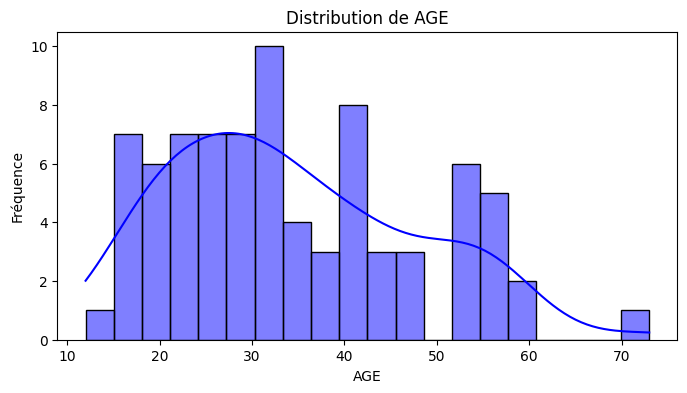

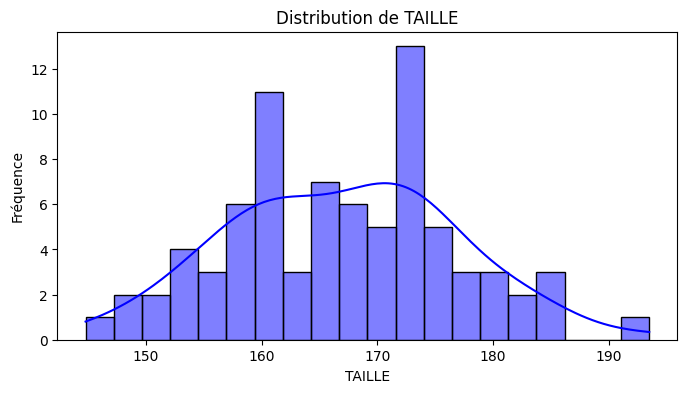

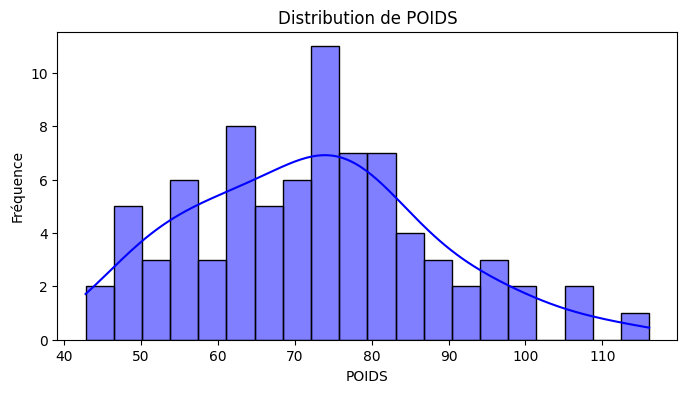

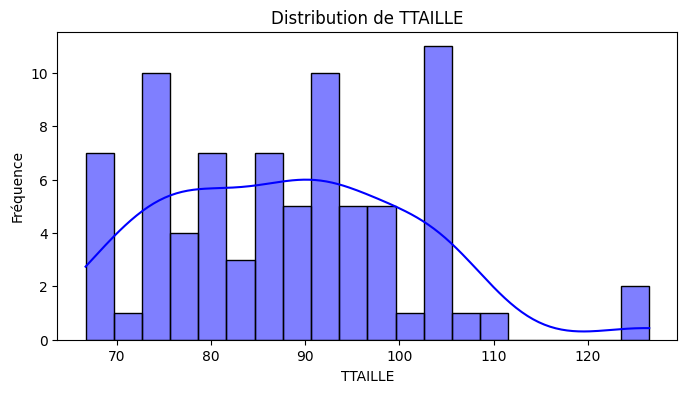

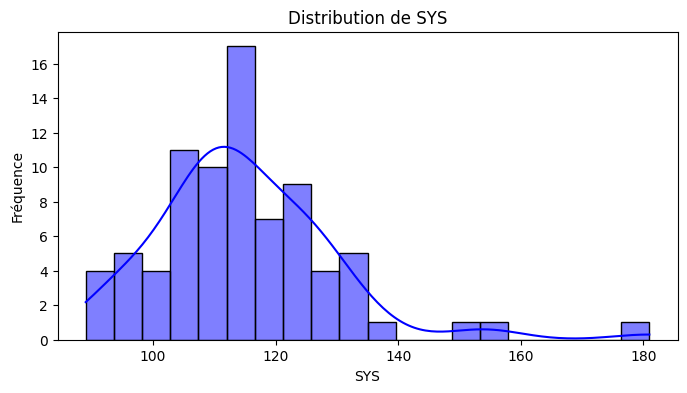

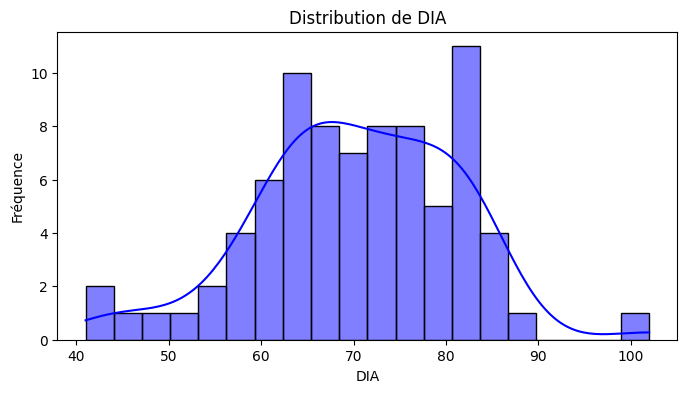

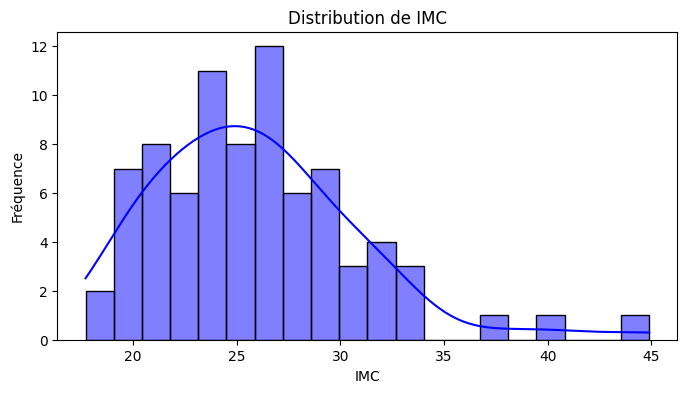

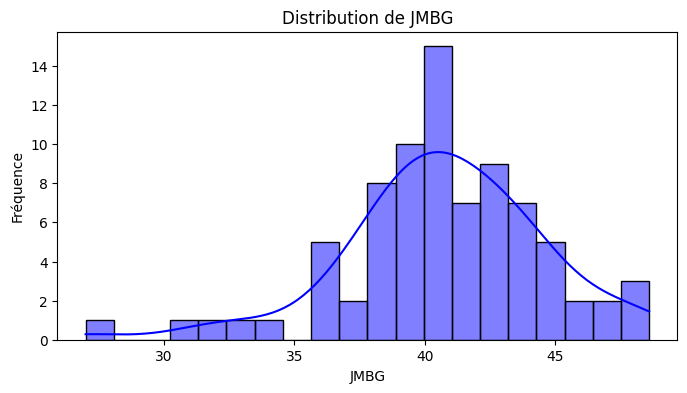

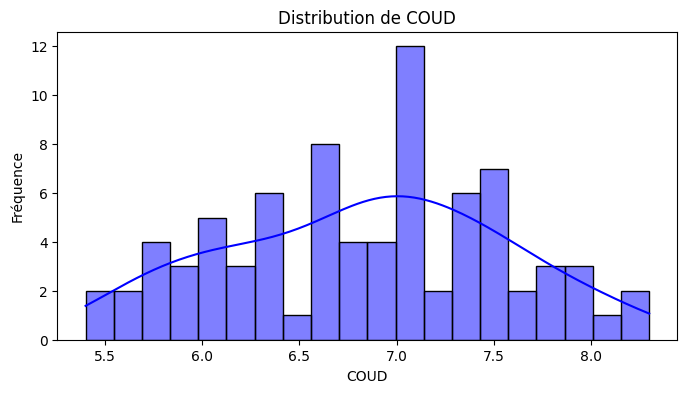

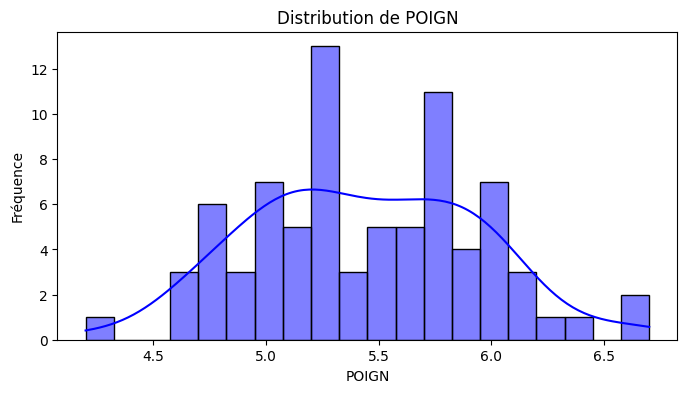

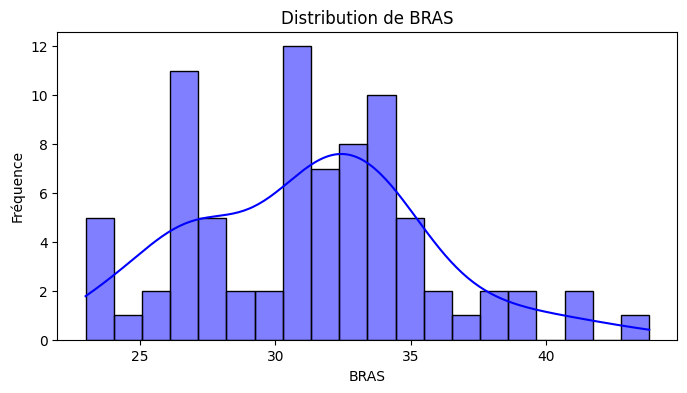

In [18]:
numerical_features = ['AGE', 'TAILLE', 'POIDS', 'TTAILLE', 'SYS', 'DIA', 'IMC', 'JMBG', 'COUD', 'POIGN', 'BRAS']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=20, color="blue")
    plt.title(f"Distribution de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Fréquence")
    plt.show()

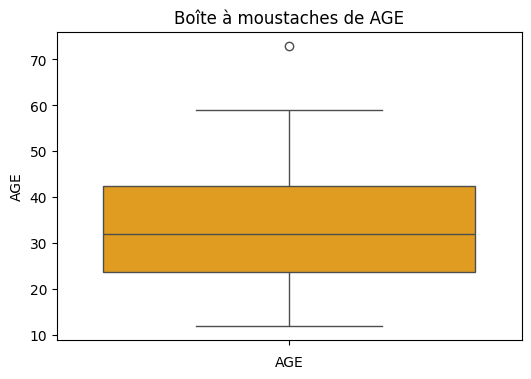

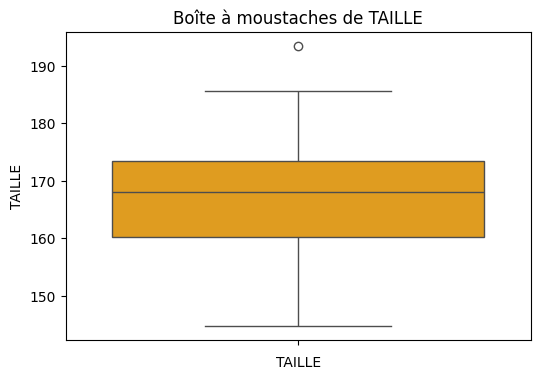

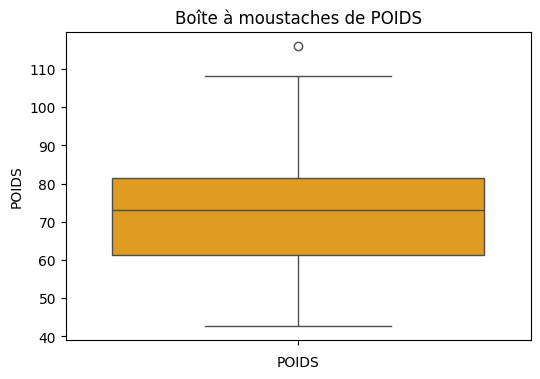

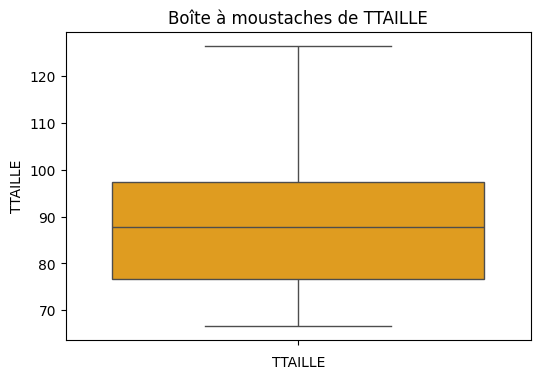

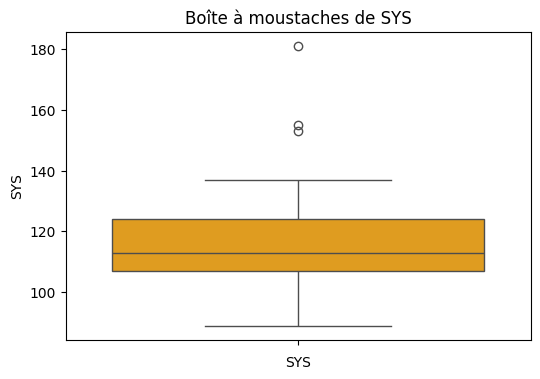

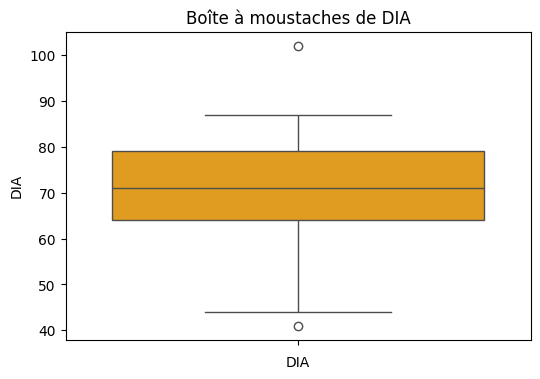

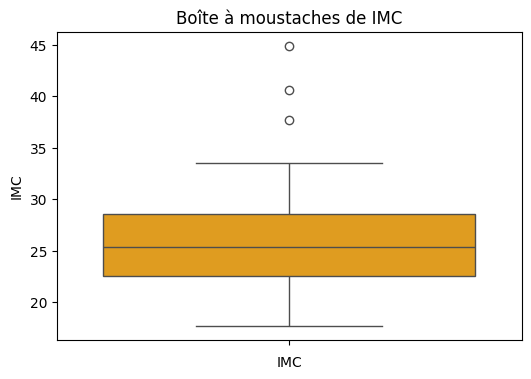

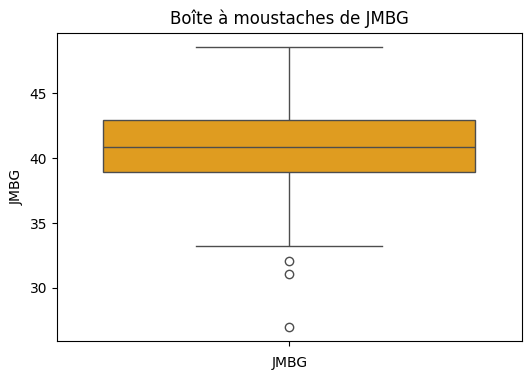

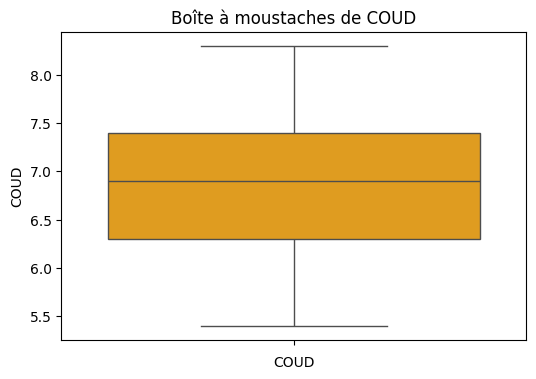

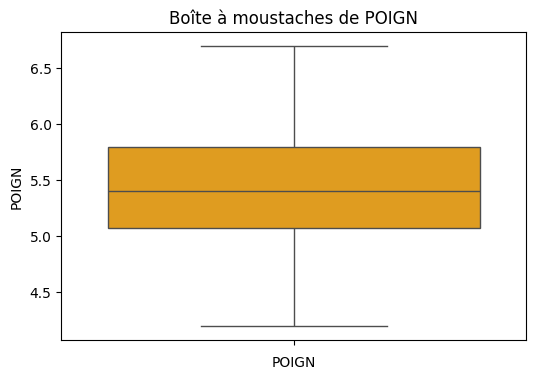

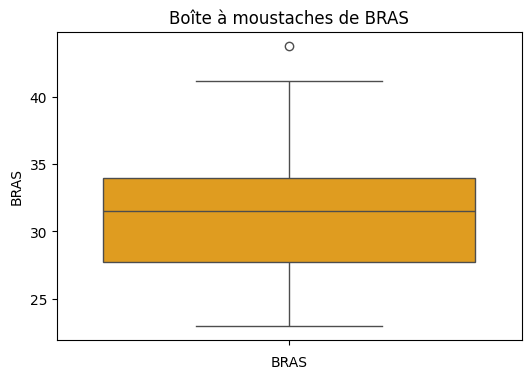

In [20]:
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[feature], color="orange")
    plt.title(f"Boîte à moustaches de {feature}")
    plt.xlabel(feature)
    plt.show()


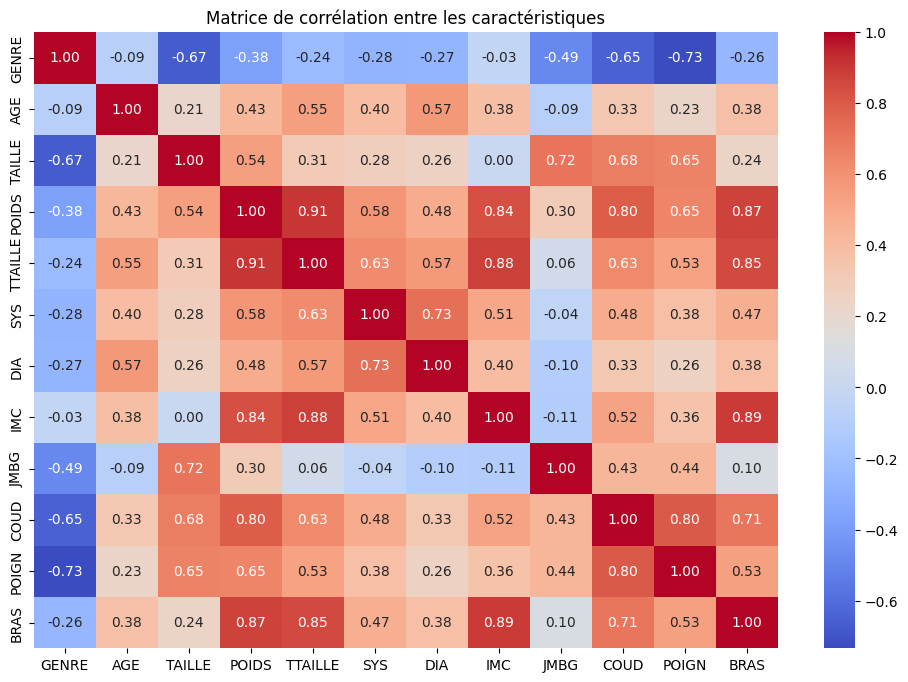

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les caractéristiques")
plt.show()

C:\Users\bassa\AppData\Local\Temp\ipykernel_1964\1962234411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="GENRE", palette="pastel")


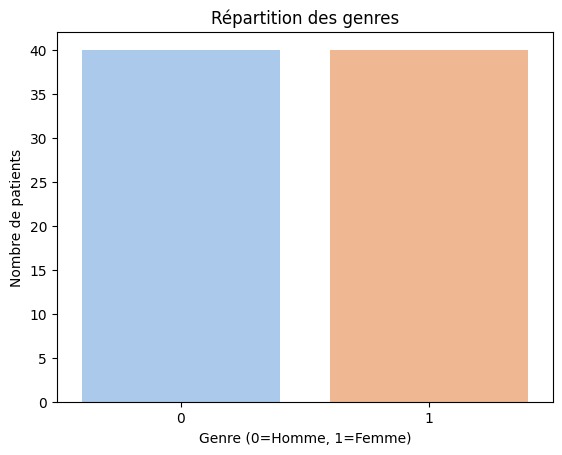

In [21]:
# Distribution des genres
sns.countplot(data=data, x="GENRE", palette="pastel")
plt.title("Répartition des genres")
plt.xlabel("Genre (0=Homme, 1=Femme)")
plt.ylabel("Nombre de patients")
plt.show()


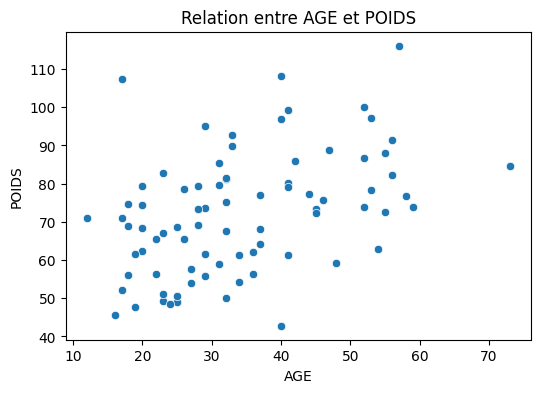

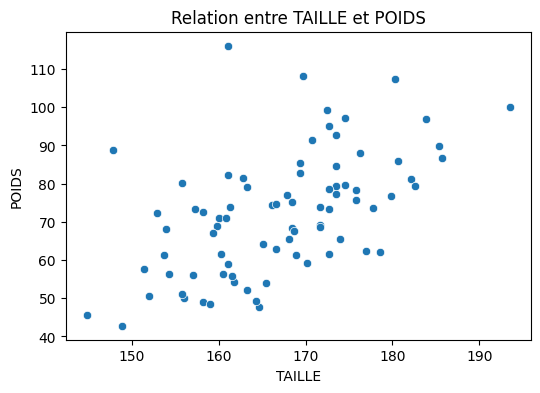

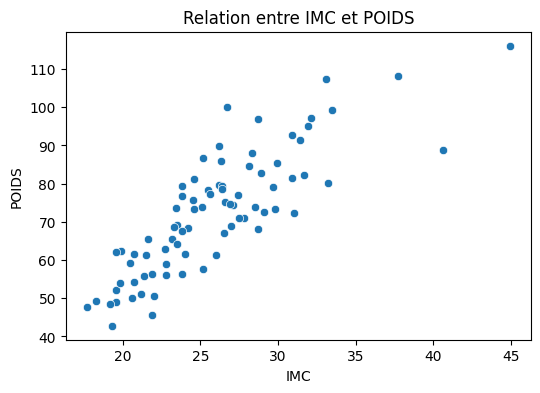

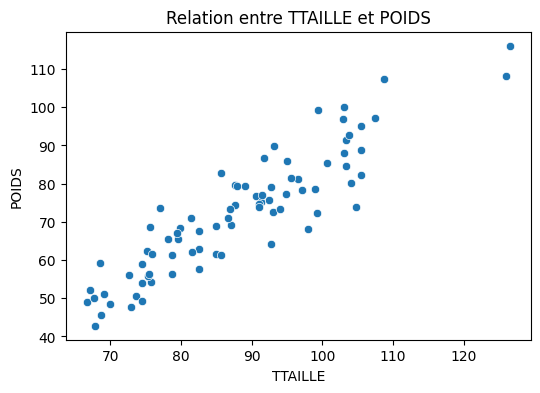

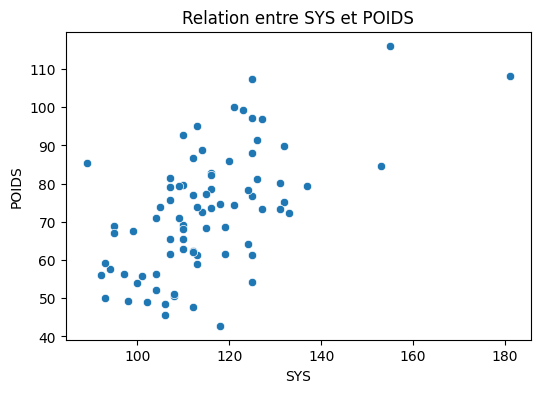

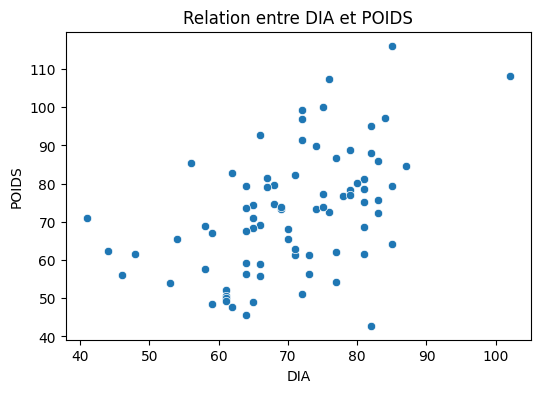

In [22]:
# Scatter plots entre le poids et chaque variable explicative
variables = ['AGE', 'TAILLE', 'IMC', 'TTAILLE', 'SYS', 'DIA']
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=var, y='POIDS')
    plt.title(f"Relation entre {var} et POIDS")
    plt.xlabel(var)
    plt.ylabel("POIDS")
    plt.show()

R² : 0.9917006233177065
RMSE : 1.4318761292015305


c:\Users\bassa\Desktop\regretion\py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


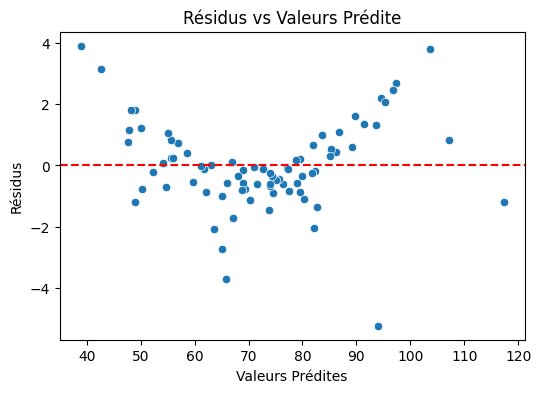

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Définir X (variables explicatives) et y (variable dépendante)
X = data[['AGE', 'TAILLE', 'IMC', 'TTAILLE', 'SYS', 'DIA']]
y = data['POIDS']

# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Calculer R² et RMSE
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"R² : {r2}")
print(f"RMSE : {rmse}")

# Visualisation des résidus
residuals = y - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Valeurs Prédite")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Résidus")
plt.show()

In [ ]:

X_reduced = data[['AGE', 'TAILLE', 'IMC']]  

# Recalculer le VIF après la réduction
X_reduced_with_const = add_constant(X_reduced)
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Variable"] = X_reduced_with_const.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced_with_const.values, i) for i in range(X_reduced_with_const.shape[1])]

print(vif_data_reduced)

  Variable         VIF
0    const  333.253789
1      AGE    1.239702
2   TAILLE    1.056162
3      IMC    1.182741


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Appliquer la régression Ridge
ridge_model = Ridge(alpha=1.0)  # Alpha est le paramètre de régularisation
ridge_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_ridge = ridge_model.predict(X_test)

# Calculer RMSE pour la régression Ridge
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f"RMSE de la régression Ridge : {rmse_ridge}")

RMSE de la régression Ridge : 1.0127505593726025


c:\Users\bassa\Desktop\regretion\py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
from sklearn.linear_model import Lasso

# Appliquer la régression Lasso
lasso_model = Lasso(alpha=0.1)  # Alpha est le paramètre de régularisation
lasso_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_lasso = lasso_model.predict(X_test)

# Calculer RMSE pour la régression Lasso
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f"RMSE de la régression Lasso : {rmse_lasso}")

# Afficher les coefficients pour voir quelles variables sont sélectionnées
print(f"Coefficients Lasso : {lasso_model.coef_}")


RMSE de la régression Lasso : 1.0132648911088642
Coefficients Lasso : [-0.01455213  0.87257732  2.66181177]


c:\Users\bassa\Desktop\regretion\py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² : 0.9912555945835397
RMSE : 1.4697648375859722


c:\Users\bassa\Desktop\regretion\py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


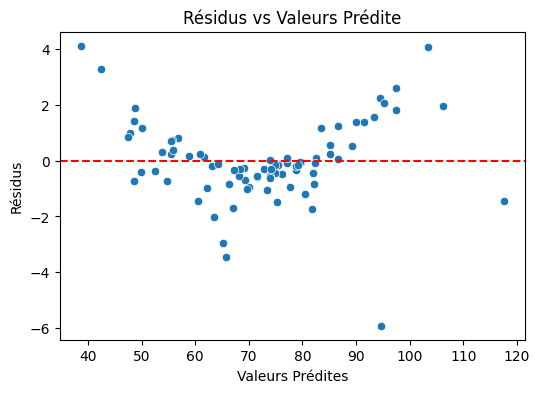

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Définir X (variables explicatives) et y (variable dépendante)
X = data[['AGE', 'TAILLE', 'IMC']]
y = data['POIDS']

# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Calculer R² et RMSE
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"R² : {r2}")
print(f"RMSE : {rmse}")

# Visualisation des résidus
residuals = y - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Valeurs Prédite")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Résidus")
plt.show()

R² : 0.9913024798864662
RMSE : 1.465819286983137


c:\Users\bassa\Desktop\regretion\py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


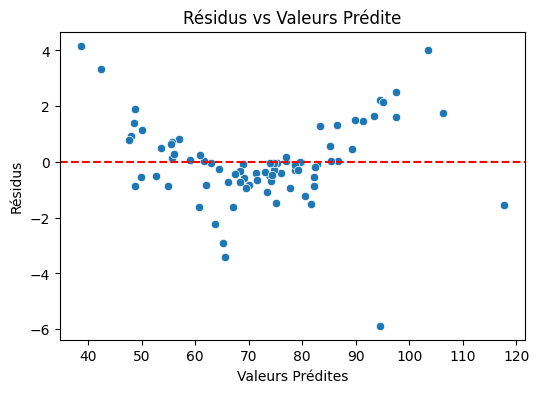

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Définir X (variables explicatives) et y (variable dépendante)
X = data[['AGE', 'TAILLE', 'IMC','GENRE']]
y = data['POIDS']

# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Calculer R² et RMSE
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"R² : {r2}")
print(f"RMSE : {rmse}")

# Visualisation des résidus
residuals = y - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Valeurs Prédite")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Résidus")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = data[['AGE', 'TAILLE', 'IMC', 'TTAILLE', 'SYS', 'DIA']]  # Variables explicatives
y = data['POIDS']  # Variable cible

# Gestion des valeurs manquantes ou infinies
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]

# Ajout d'une constante pour les calculs VIF
X_with_const = sm.add_constant(X)

# Calcul des VIF
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("VIF des variables :\n", vif)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire classique
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

print(f"Régression linéaire - R² : {r2_linear}, RMSE : {rmse_linear}")

# Modèle de régression Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f"Régression Ridge - R² : {r2_ridge}, RMSE : {rmse_ridge}")

# Modèle de régression Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f"Régression Lasso - R² : {r2_lasso}, RMSE : {rmse_lasso}")

# Comparaison des modèles
models_summary = pd.DataFrame({
    "Modèle": ["Régression Linéaire", "Ridge", "Lasso"],
    "R²": [r2_linear, r2_ridge, r2_lasso],
    "RMSE": [rmse_linear, rmse_ridge, rmse_lasso]
})

print("\nRésumé des performances des modèles :\n", models_summary)

# Validation croisée (facultatif)
cross_val_ridge = np.mean(cross_val_score(ridge_model, X, y, cv=5, scoring='r2'))
print(f"Validation croisée (R²) pour Ridge : {cross_val_ridge}")




VIF des variables :
   Variable         VIF
0    const  423.637294
1      AGE    1.778687
2   TAILLE    1.785416
3      IMC    7.683416
4  TTAILLE   10.493842
5      SYS    2.585446
6      DIA    2.734330
Régression linéaire - R² : 0.9940950959227047, RMSE : 1.0750615879920842
Régression Ridge - R² : 0.9940407246921149, RMSE : 1.0799997277131579
Régression Lasso - R² : 0.9940238843187246, RMSE : 1.0815246419630313

Résumé des performances des modèles :
                 Modèle        R²      RMSE
0  Régression Linéaire  0.994095  1.075062
1                Ridge  0.994041  1.080000
2                Lasso  0.994024  1.081525
Validation croisée (R²) pour Ridge : 0.9813764731005792


C:\Users\bassa\AppData\Local\Temp\ipykernel_1964\1636456216.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\bassa\AppData\Local\Temp\ipykernel_1964\1636456216.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
c:\Users\bassa\Desktop\regretion\py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\bassa\Desktop\regretion\py_env\Lib\site